**WalMart prediction for Sales(/content/Walmart.csv)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import sqrt

import datetime
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [6]:
df = pd.read_csv('/content/Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
df.shape

(6435, 8)

In [22]:
# Converting 'Date' column to datetime and adding 'Year', 'Month' and 'Week' column

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] =df['Date'].dt.year
df['Month'] =df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9


In [24]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int32         
 9   Month         6435 non-null   int32         
 10  Week          6435 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(5), int32(2), int64(2)
memory usage: 484.0 KB


In [25]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.447552,25.818182
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.0
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,14.0
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,26.0
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,38.0
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,52.0
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.238308,14.129201


In [26]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0
Year,0
Month,0


In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:
df.groupby('Year')['Weekly_Sales'].mean()

,Weekly_Sales
Year,
2010,1.059670e+06
2011,1.046239e+06
2012,1.033660e+06


In [29]:
df.groupby('Month')['Weekly_Sales'].mean()

,Weekly_Sales
Month,
1,9.238846e+05
2,1.053200e+06
3,1.013309e+06
4,1.026762e+06
5,1.031714e+06
6,1.064325e+06
7,1.031748e+06
8,1.048017e+06
9,9.893353e+05


# Data Visualization

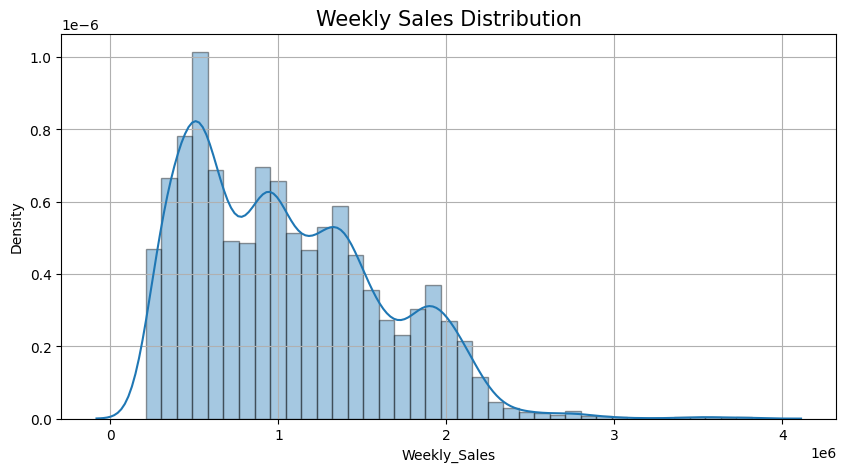

In [30]:
plt.figure(figsize = (10, 5))
sns.distplot(df['Weekly_Sales'], hist_kws=dict(edgecolor="black"))
plt.title('Weekly Sales Distribution', fontsize= 15)
plt.grid()
plt.show()

In [31]:
df['Holiday_Flag'].value_counts()

,count
Holiday_Flag,
0,5985
1,450


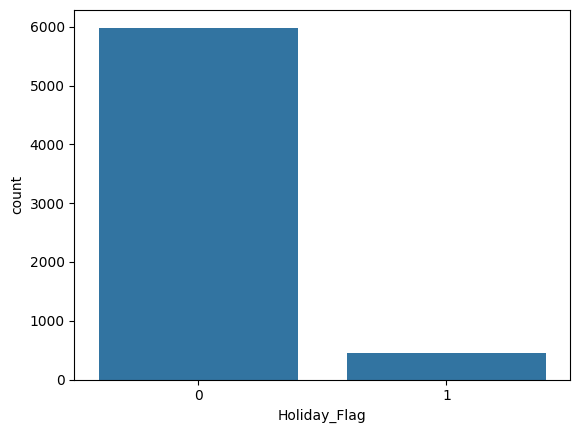

In [32]:
sns.countplot(x = 'Holiday_Flag', data = df);

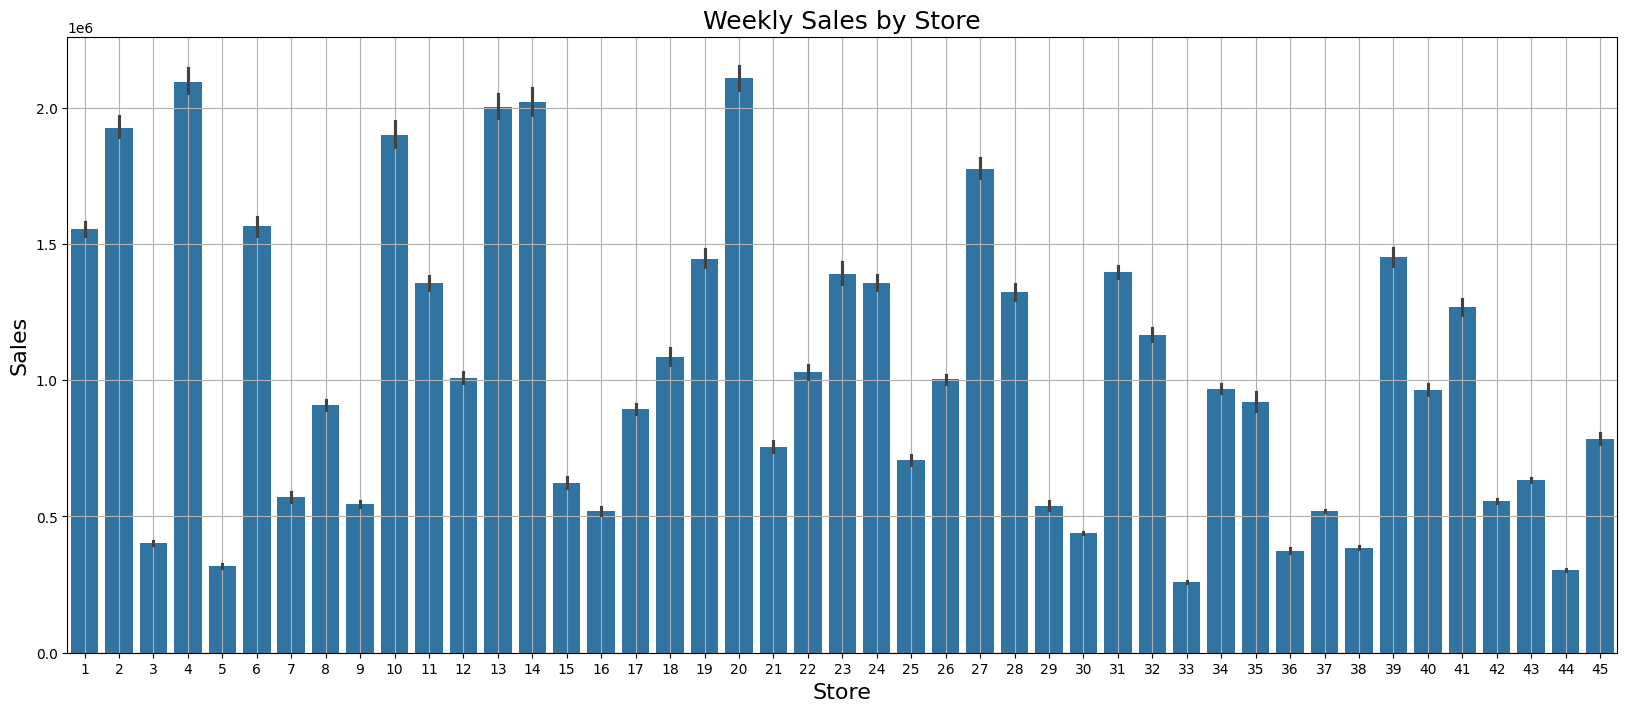

In [42]:
plt.figure(figsize=(20,8))
sns.barplot(x = 'Store', y = 'Weekly_Sales', data = df)
plt.title('Weekly Sales by Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.grid()
plt.show()

In [36]:
#This function plots the graph relation between a categorized feature and the Weekly_Sales

def graph_relation_to_weekly_sale(col_relation, df, x='Week', palette=None):
    cmap = sns.diverging_palette(220, 20, as_cmap=True)

    sns.relplot(
        x=x,
        y='Weekly_Sales',
        hue=col_relation,
        data=df,
        kind='line',
        height=5,
        aspect=2,
        palette=palette
    )
    plt.show()

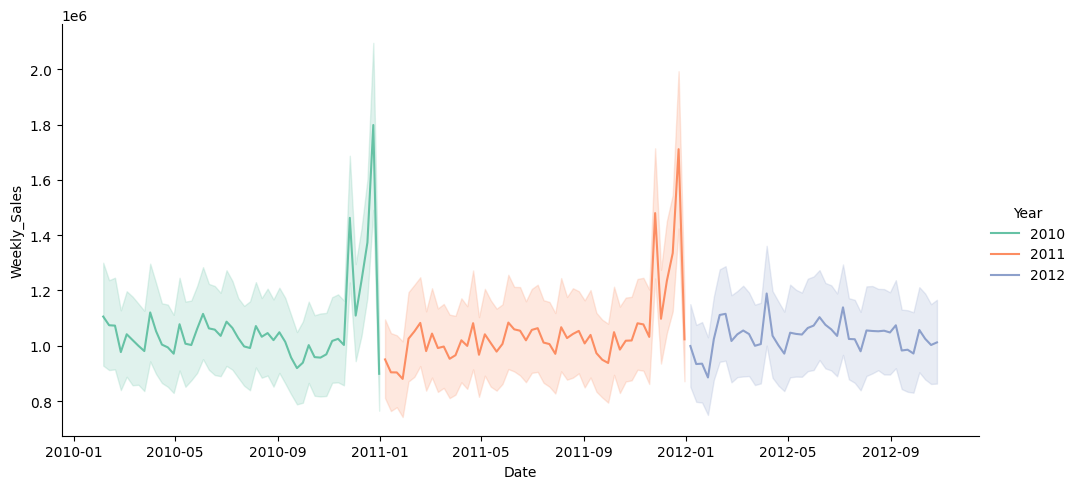

In [38]:
graph_relation_to_weekly_sale('Year', df, x='Date', palette='Set2')

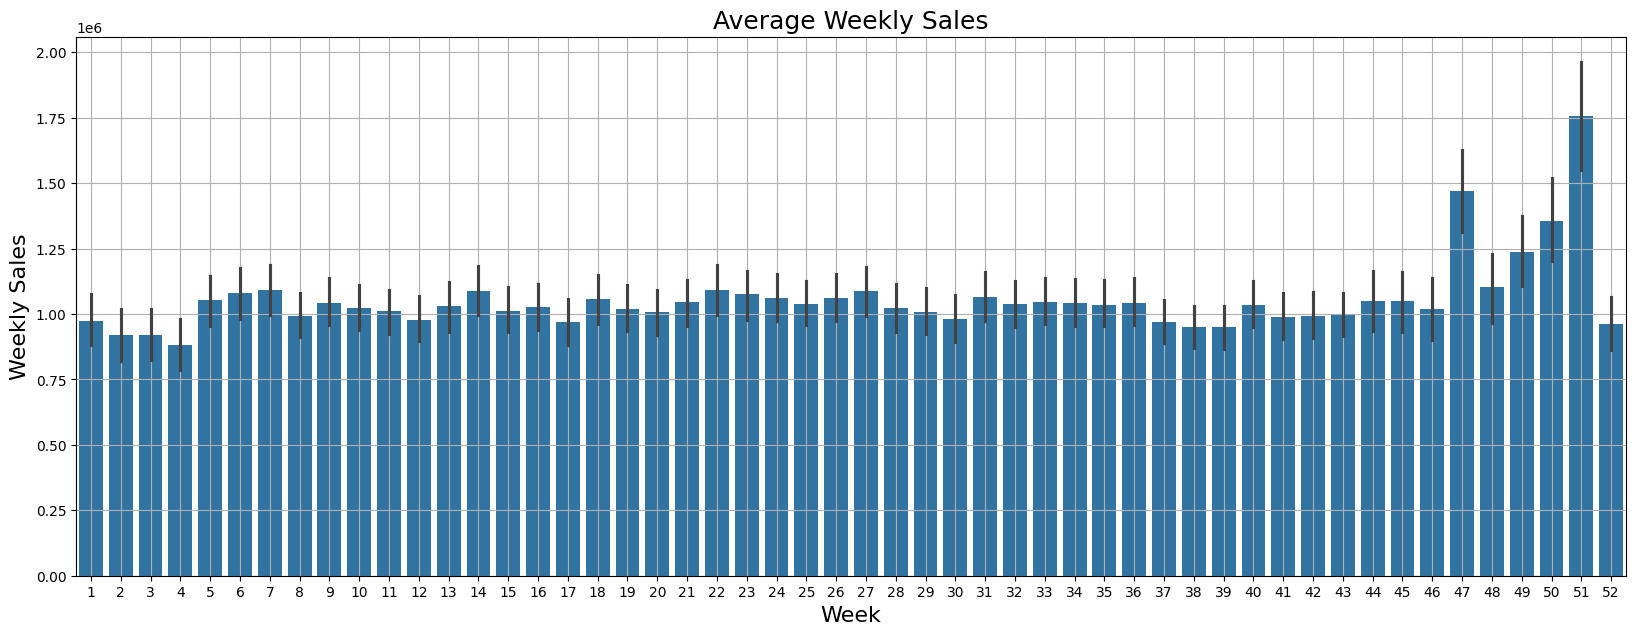

In [41]:
plt.figure(figsize = (20, 7))
#sns.barplot(df['Week'], df['Weekly_Sales'])
sns.barplot(x = 'Week', y = 'Weekly_Sales', data = df)
plt.title('Average Weekly Sales', fontsize=18)
plt.ylabel('Weekly Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.grid()
plt.show()

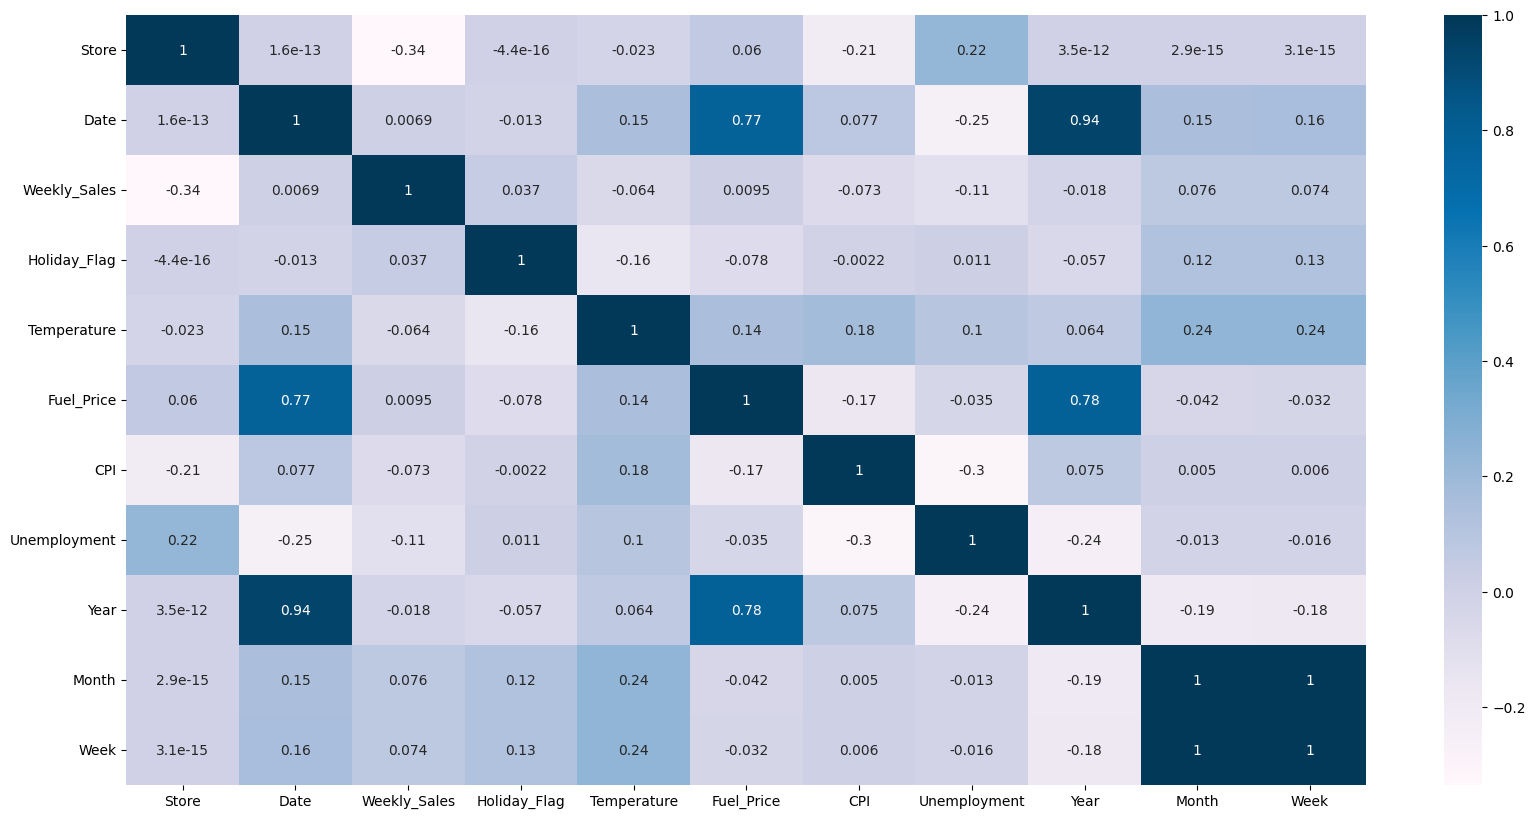

In [44]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), cmap = 'PuBu', annot = True)
plt.show()

In [45]:
df.drop(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], axis = 1, inplace = True)

In [46]:
x = df.drop(['Date','Weekly_Sales'], axis=1)
x

,Store,Holiday_Flag,Year,Month,Week
0,1,0,2010,2,5
1,1,1,2010,2,6
2,1,0,2010,2,7
3,1,0,2010,2,8
4,1,0,2010,3,9
...,...,...,...,...,...
6430,45,0,2012,9,39
6431,45,0,2012,10,40
6432,45,0,2012,10,41
6433,45,0,2012,10,42


In [48]:
y = df['Weekly_Sales']

In [49]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x, y)

RandomForestRegressor()

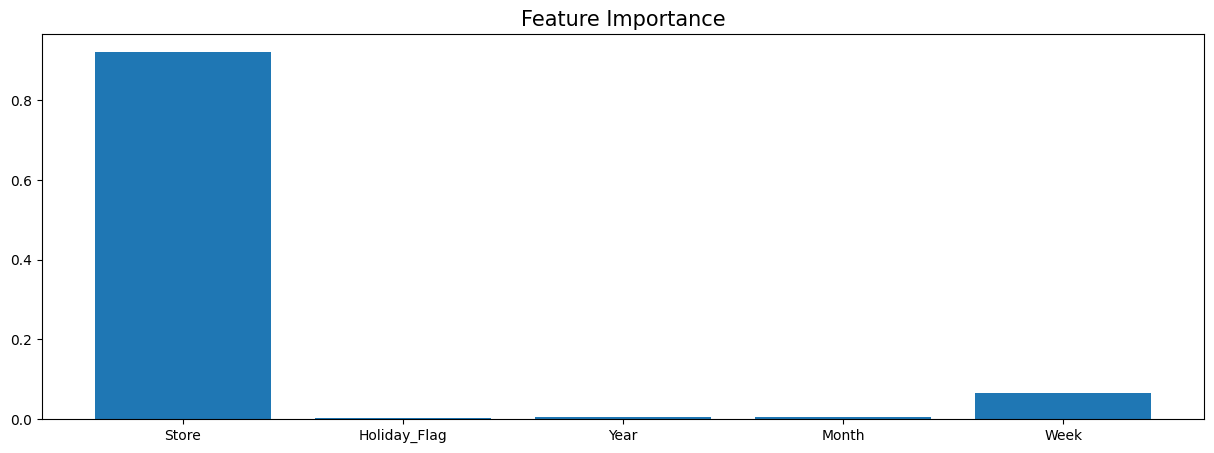

In [50]:
plt.figure(figsize = (15, 5))
plt.bar(x.columns, rf.feature_importances_)
plt.title("Feature Importance", fontsize = 15)
plt.show()

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0)

"""### Linear Regression"""

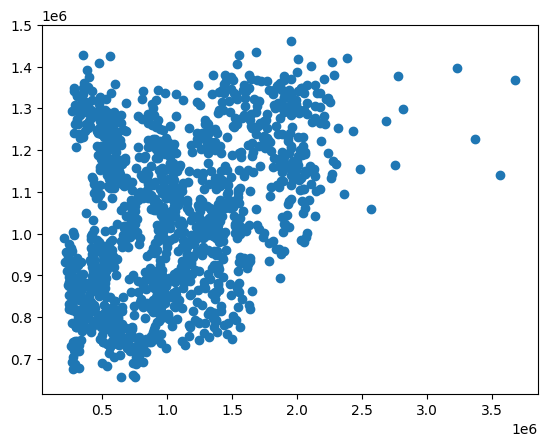

In [52]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

plt.scatter(y_test, y_pred)

In [53]:
print("R2 Score: ", r2_score(y_test, y_pred))
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("RMSE : ", sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.14403297281947725
MSE Score:  270539024573.757
RMSE :  520133.6602968097


**Decision Tree**

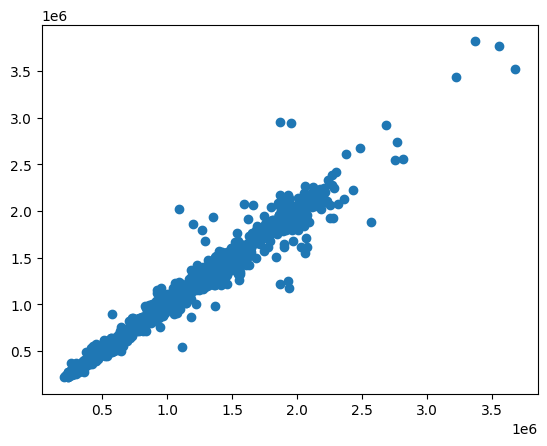

In [54]:
dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

y_pred1 = dtree.predict(x_test)

plt.scatter(y_test, y_pred1)

In [55]:
print("R2 Score: ", r2_score(y_test, y_pred1))
print("MSE Score: ", mean_squared_error(y_test, y_pred1))
print("RMSE : ", sqrt(mean_squared_error(y_test, y_pred1)))

R2 Score:  0.9638896807702788
MSE Score:  11413115495.388613
RMSE :  106832.1837995864


"""Random Forest"""

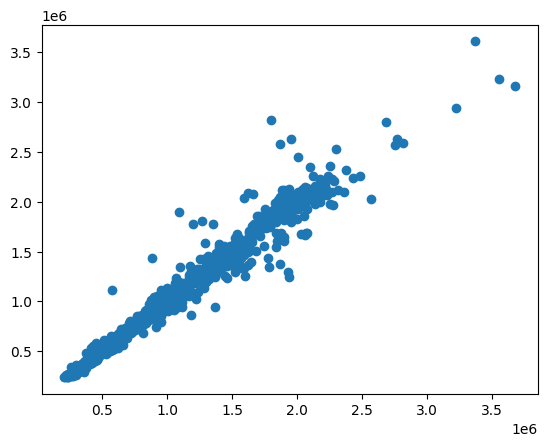

In [56]:
rf1 = RandomForestRegressor(n_estimators = 100)
rf1.fit(x_train, y_train)

y_pred2 = rf1.predict(x_test)

plt.scatter(y_test, y_pred2)

In [57]:
print("R2 Score: ", r2_score(y_test, y_pred2))
print("MSE Score: ", mean_squared_error(y_test, y_pred2))
print("RMSE : ", sqrt(mean_squared_error(y_test, y_pred2)))

R2 Score:  0.9671553997172815
MSE Score:  10380944406.550863
RMSE :  101886.91970292783


""" KNN"""

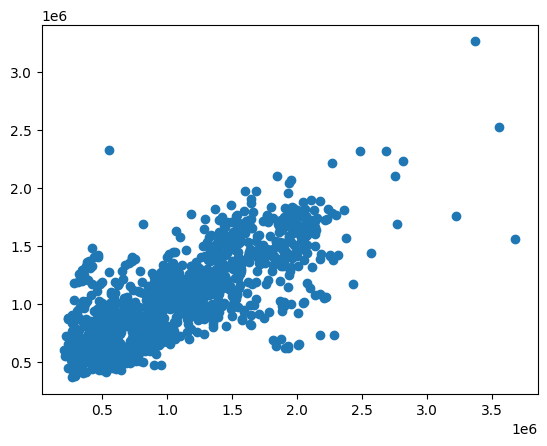

In [58]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

y_pred3 = knn.predict(x_test)

plt.scatter(y_test, y_pred3)

In [59]:
print("R2 Score: ", r2_score(y_test, y_pred3))
print("MSE Score: ", mean_squared_error(y_test, y_pred3))
print("RMSE : ", sqrt(mean_squared_error(y_test, y_pred3)))

R2 Score:  0.5740826090974337
MSE Score:  134616488515.13354
RMSE :  366901.1972113658


""" Getting Average of Best Models"""

R2 Score:  0.9335801584180599
MSE Score:  20992816993.325474
RMSE :  144888.98161463306


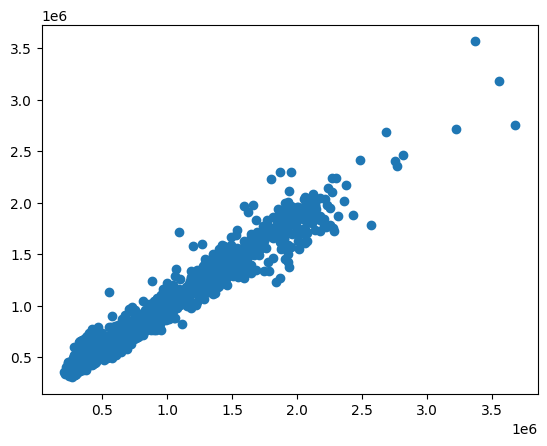

In [63]:
y_pred_final = (y_pred1 + y_pred2 + y_pred3)/3

plt.scatter(y_test, y_pred_final)

print("R2 Score: ", r2_score(y_test, y_pred_final))
print("MSE Score: ", mean_squared_error(y_test, y_pred_final))
print("RMSE : ", sqrt(mean_squared_error(y_test, y_pred_final)))

"""# Reasons For Choosing the Algorithm

I have tried Linear Regression, Decision Tree, Random Forest, KNN and XGBoost algorithms. We can see above Linear Regression And KNN model is not fitting for this dataset but Random Forest, Decision Tree and is working good for this dataset.

#  Assumptions

It is not possible to accurately forecast the sales for each store for the next 12 weeks using machine learning without additional information. Machine learning algorithms require data to be able to make predictions. This data could include historical sales data, customer demographics, store location, and other factors. Without this data, it is not possible to accurately forecast sales for each store for the next 12 weeks.